<a href="https://colab.research.google.com/github/TarekElbaik/CNN-image-classification/blob/main/cnn-img-class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


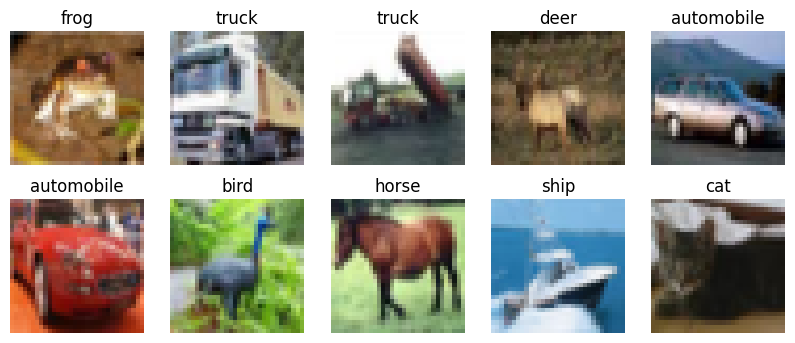

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Show some training images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [3]:
# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 4. Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
# 5. Train Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3470 - loss: 1.7691 - val_accuracy: 0.5383 - val_loss: 1.2901
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.5784 - loss: 1.1975 - val_accuracy: 0.6224 - val_loss: 1.0757
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6440 - loss: 1.0175 - val_accuracy: 0.6469 - val_loss: 1.0073
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6819 - loss: 0.9066 - val_accuracy: 0.6584 - val_loss: 0.9697
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7052 - loss: 0.8335 - val_accuracy: 0.6810 - val_loss: 0.9071
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7286 - loss: 0.7697 - val_accuracy: 0.6966 - val_loss: 0.8790
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7531 - loss: 0.7094 - val_accuracy: 0.6983 - val_loss: 0.8928
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.7649 -

In [6]:
# 6. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.7093 - loss: 0.8903

Test accuracy: 0.7092999815940857


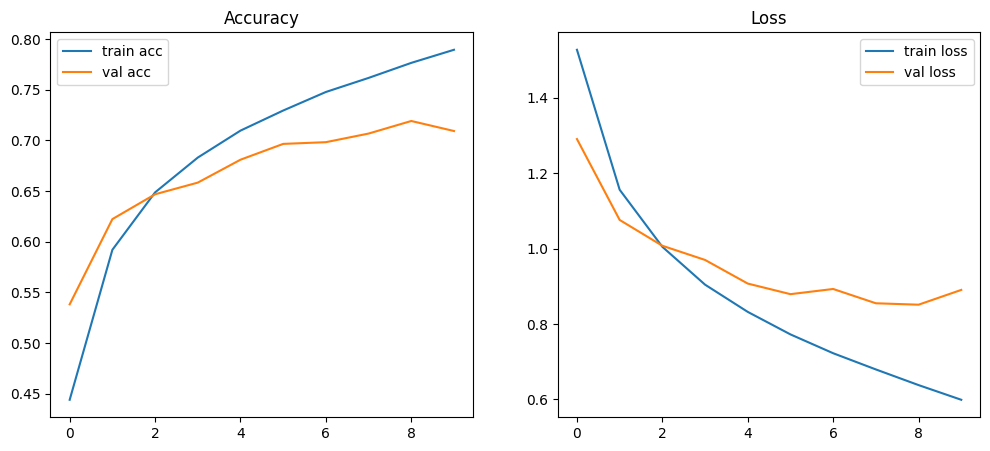

In [7]:
# 7. Plot Training History
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


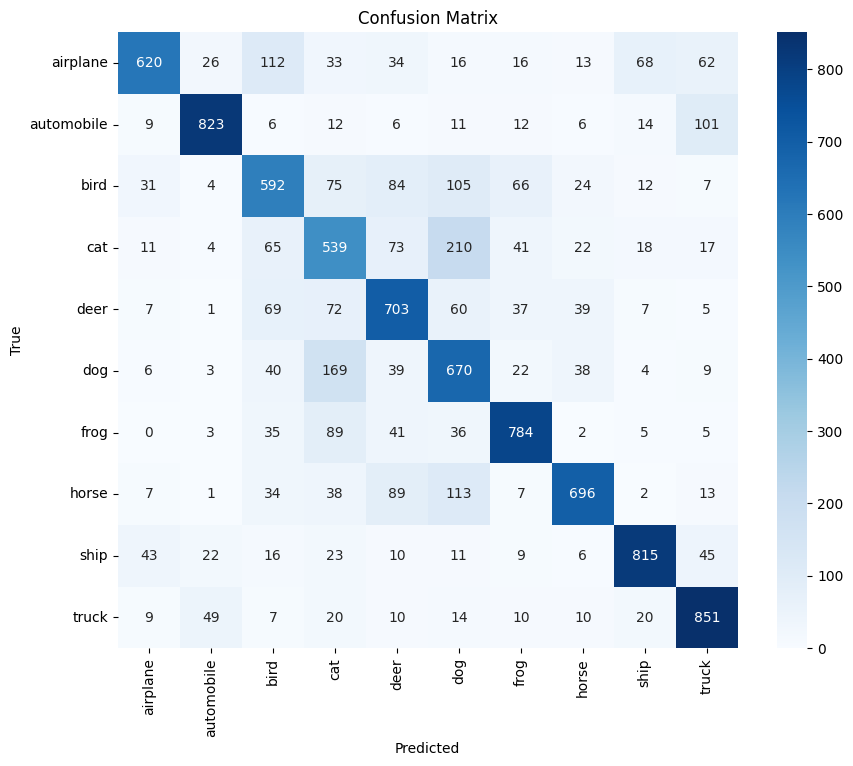

In [8]:
# 8. Confusion Matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


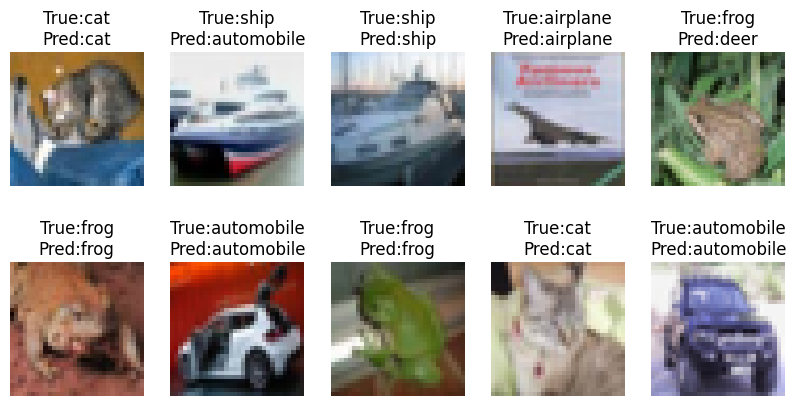

In [9]:
# 9. Show Predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True:{class_names[y_test[i]]}\nPred:{class_names[y_pred[i]]}")
    plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


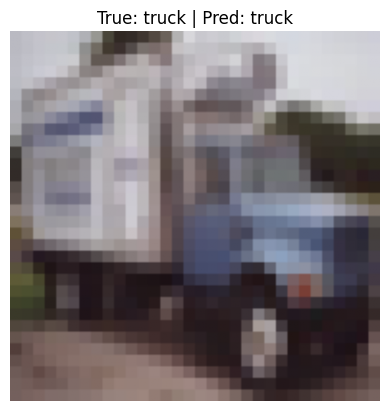

In [14]:
# 10. Test on a Random Image from Test Set (Improved Display)
import random
import cv2

# Pick a random index
idx = random.randint(0, len(x_test) - 1)

# Get the image and true label
img = x_test[idx]
true_label = y_test[idx]

# Expand dims so model sees it as a batch (1, 32, 32, 3)
img_input = np.expand_dims(img, axis=0)

# Make prediction
pred = model.predict(img_input)
pred_label = np.argmax(pred)

# Resize for better visualization (from 32x32 → 128x128)
img_resized = cv2.resize(img, (128, 128), interpolation=cv2.INTER_NEAREST)

# Display image with prediction
plt.imshow(img_resized)
plt.title(f"True: {class_names[true_label]} | Pred: {class_names[pred_label]}")
plt.axis("off")
plt.show()


In [15]:
# 11. Data Augmentation and Retraining
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rotation_range=15,       # rotate images by up to 15 degrees
    width_shift_range=0.1,   # shift width by 10%
    height_shift_range=0.1,  # shift height by 10%
    horizontal_flip=True     # randomly flip images horizontally
)

# Fit generator on training data
datagen.fit(x_train)

# Re-train model using augmented data
batch_size = 64
epochs = 20

history_aug = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 105s 135ms/step - accuracy: 0.6704 - loss: 0.9444 - val_accuracy: 0.7138 - val_loss: 0.8475
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:33 119ms/step - accuracy: 0.6562 - loss: 1.1293

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6562 - loss: 1.1293 - val_accuracy: 0.7137 - val_loss: 0.8502
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 129s 124ms/step - accuracy: 0.6931 - loss: 0.8742 - val_accuracy: 0.7152 - val_loss: 0.8480
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7188 - loss: 0.8567 - val_accuracy: 0.7206 - val_loss: 0.8226
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.6998 - loss: 0.8573 - val_accuracy: 0.7367 - val_loss: 0.7714
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6875 - loss: 0.8644 - val_accuracy: 0.7389 - val_loss: 0.7682
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 137s 125ms/step - accuracy: 0.7094 - loss: 0.8410 - val_accuracy: 0.7260 - val_loss: 0.8211
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8281 - loss: 0.5388 - val_accuracy: 0.7248 - val_loss: 0.8273
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.7075 - loss: 0.8229 - val_accuracy:

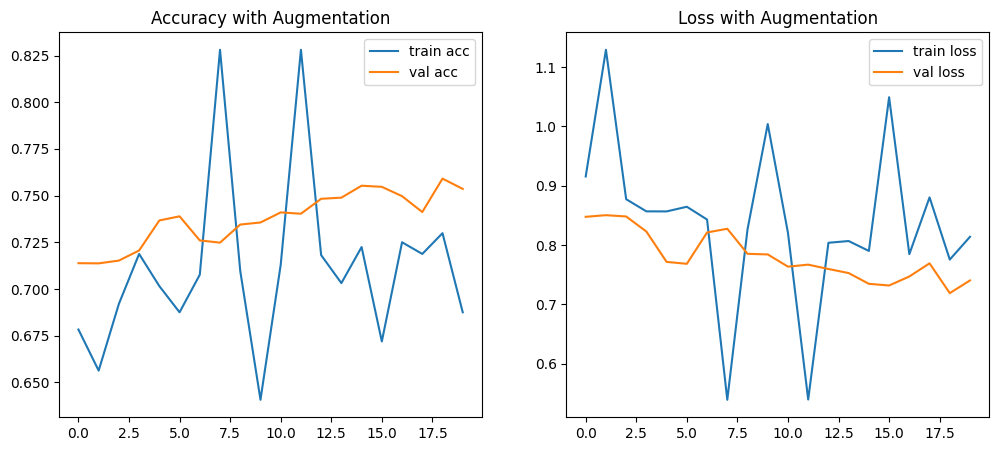

In [16]:
# 12. Plot Accuracy & Loss with Augmentation
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_aug.history["accuracy"], label="train acc")
plt.plot(history_aug.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Accuracy with Augmentation")

plt.subplot(1,2,2)
plt.plot(history_aug.history["loss"], label="train loss")
plt.plot(history_aug.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss with Augmentation")

plt.show()
